Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [ ]:
## If you are using the data by mounting the google drive, use the following :
#from google.colab import drive
#drive.mount('/content/gdrive',force_remount=True)

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("/content/gdrive/My Drive/PGD-AI-ML/Malenoma-Assignment/Train")
data_dir_test = pathlib.Path("/content/gdrive/My Drive/PGD-AI-ML/Malenoma-Assignment/Test")

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(directory=data_dir_train, labels='inferred', 
                                                    label_mode='categorical',color_mode='rgb', batch_size=batch_size, 
                                                    image_size=(img_height,img_width), shuffle=True, seed=123, 
                                                    validation_split=0.2, subset="training")

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(directory=data_dir_train, labels='inferred', 
                                                    label_mode='categorical',color_mode='rgb', batch_size=batch_size, 
                                                    image_size=(img_height,img_width), shuffle=True, seed=123, 
                                                    validation_split=0.2, subset="validation")

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

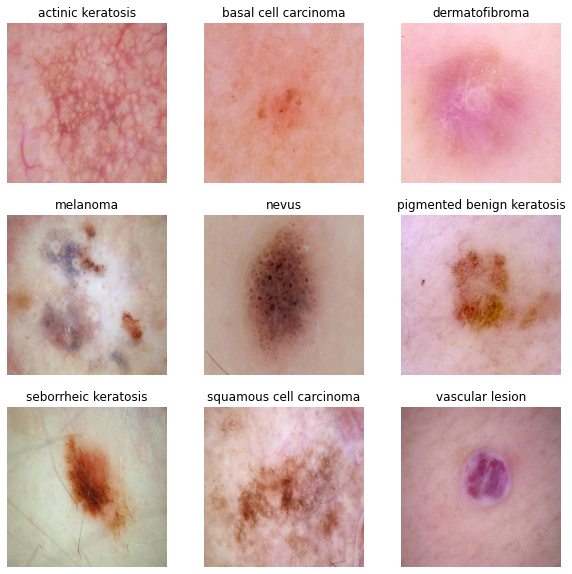

In [ ]:
import matplotlib.pyplot as plt
i = 0
found_class=False
plt.figure(figsize=(10, 10))
for class_name in class_names:
    for images, labels in train_ds:
        for label,image in zip(labels,images):
            if (class_names[np.where(label == 1)[0][0]] == class_name):
                ax = plt.subplot(3, 3, i + 1)
                plt.imshow(image.numpy().astype("uint8"))
                plt.title(class_names[np.where(label == 1)[0][0]])
                plt.axis("off")
                found_class = True
                break
        if found_class:
            found_class=False
            break
    i+=1
### your code goes here, you can use training or validation data to visualize

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Creating a CNN model, which can accurately detect 9 classes present in the dataset. Using ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:

model = Sequential()

model.add(tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255, offset=0.0,input_shape=(img_height,img_width,3)))

model.add(Conv2D(32, kernel_size=(3, 3),activation='relu'))
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3),activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu')) 
model.add(Dense(9, activation='softmax'))
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_13 (Rescaling)     (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 178, 178, 32)      896       
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 176, 176, 32)      9248      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 88, 88, 32)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 86, 86, 64)        18496     
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 84, 84, 64)        36928     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 42, 42, 64)      

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_13 (Rescaling)     (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 178, 178, 32)      896       
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 176, 176, 32)      9248      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 88, 88, 32)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 86, 86, 64)        18496     
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 84, 84, 64)        36928     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 42, 42, 64)      

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 16s 113ms/step - loss: 2.0895 - accuracy: 0.2589 - val_loss: 1.7349 - val_accuracy: 0.3535
Epoch 2/20
56/56 [==============================] - 4s 64ms/step - loss: 1.6690 - accuracy: 0.3856 - val_loss: 1.5722 - val_accuracy: 0.4430
Epoch 3/20
56/56 [==============================] - 4s 64ms/step - loss: 1.5900 - accuracy: 0.4258 - val_loss: 1.4471 - val_accuracy: 0.4966
Epoch 4/20
56/56 [==============================] - 4s 64ms/step - loss: 1.4147 - accuracy: 0.5061 - val_loss: 1.4311 - val_accuracy: 0.5190
Epoch 5/20
56/56 [==============================] - 4s 64ms/step - loss: 1.3283 - accuracy: 0.5346 - val_loss: 1.4205 - val_accuracy: 0.5168
Epoch 6/20
56/56 [==============================] - 4s 65ms/step - loss: 1.2692 - accuracy: 0.5513 - val_loss: 1.6667 - val_accuracy: 0.4161
Epoch 7/20
56/56 [==============================] - 4s 65ms/step - loss: 1.2531 - accuracy: 0.5597 - val_loss: 1.7097 - val_accuracy: 0.4362
Epoch 8/20


### Visualizing training results

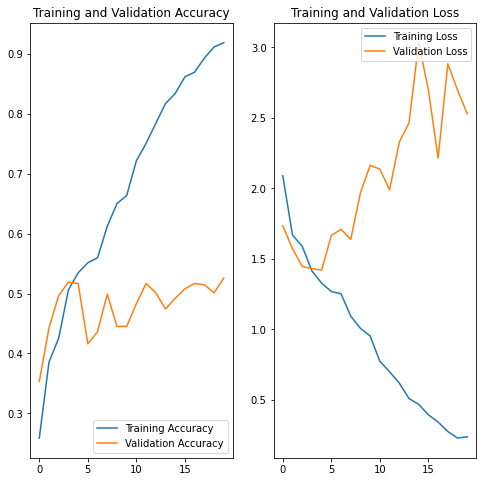

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Findings:

There is a huge difference between the train and validation accuracy which is around 35-40 And the train accuracy is continuously increasing with the epoch whereas the validation accuracy is not increasing significantly with epoch. Hence the model is overfit

In [ ]:
# data augmentation using the Flip and Rotation
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

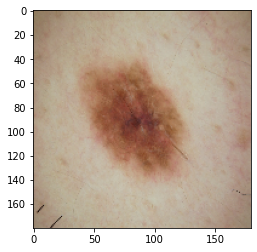

In [ ]:
# Getting one image from the train dataset
images, labels = next(iter(train_ds))
image = images[0]
image = image.numpy().astype("uint8")
plt.imshow(image)

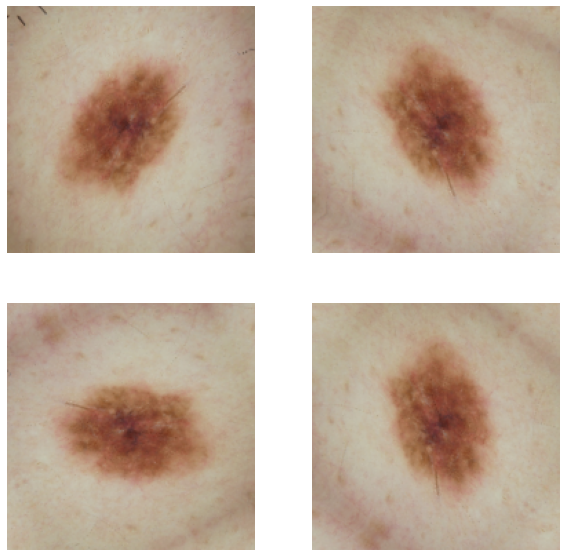

In [ ]:
# Visualizing the augmentation on the above image
image = tf.expand_dims(image, 0)
plt.figure(figsize=(10, 10))
for i in range(4):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(2,2, i + 1)
  augmented_image = augmented_image[0]
  plt.imshow(augmented_image.numpy().astype('uint8'))
  plt.axis("off")


### Create the model, compile and train the model


In [ ]:
model2 = Sequential()

data_augmentation

model2.add(tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255, offset=0.0,input_shape=(img_height,img_width,3)))

model2.add(Conv2D(32, kernel_size=(3, 3),activation='relu'))
model2.add(Conv2D(32, kernel_size=(3, 3),activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(64, kernel_size=(3, 3),activation='relu'))
model2.add(Conv2D(64, kernel_size=(3, 3),activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(128, activation='relu')) 
model2.add(Dropout(0.5))
model2.add(Dense(9, activation='softmax'))
model2.summary()


Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_14 (Rescaling)     (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 178, 178, 32)      896       
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 176, 176, 32)      9248      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 88, 88, 32)        0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 88, 88, 32)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 86, 86, 64)        18496     
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 84, 84, 64)      

### Compiling the model

In [ ]:
model2.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])
model2.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_14 (Rescaling)     (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 178, 178, 32)      896       
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 176, 176, 32)      9248      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 88, 88, 32)        0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 88, 88, 32)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 86, 86, 64)        18496     
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 84, 84, 64)      

### Training the model

In [ ]:
epochs = 20
history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 4s 69ms/step - loss: 2.2583 - accuracy: 0.1981 - val_loss: 2.0765 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 4s 66ms/step - loss: 2.0300 - accuracy: 0.2020 - val_loss: 1.9220 - val_accuracy: 0.2617
Epoch 3/20
56/56 [==============================] - 4s 66ms/step - loss: 1.9438 - accuracy: 0.2790 - val_loss: 1.8993 - val_accuracy: 0.3065
Epoch 4/20
56/56 [==============================] - 4s 66ms/step - loss: 1.8739 - accuracy: 0.3119 - val_loss: 1.7737 - val_accuracy: 0.3960
Epoch 5/20
56/56 [==============================] - 4s 66ms/step - loss: 1.8120 - accuracy: 0.3320 - val_loss: 1.7685 - val_accuracy: 0.3445
Epoch 6/20
56/56 [==============================] - 4s 66ms/step - loss: 1.7692 - accuracy: 0.3627 - val_loss: 1.8324 - val_accuracy: 0.3087
Epoch 7/20
56/56 [==============================] - 4s 66ms/step - loss: 1.8111 - accuracy: 0.3337 - val_loss: 1.6996 - val_accuracy: 0.4385
Epoch 8/20
56

### Visualizing the results

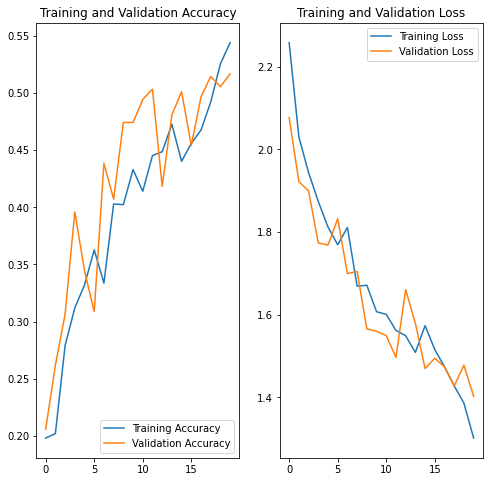

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Findings:

The training accuracy and the validation accuracy are comparable now. The overfitting has reduced but the accuracy is less. Model can do better than this

####  Finding the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
# Finding the distribution of each class in the train dataset
unbatched_train = train_ds.unbatch()
x = unbatched_train.enumerate()
label_array = []
for ele in x.as_numpy_iterator():
  label_array.append(list(ele[1][1]))
label_array = np.array(label_array)
count = label_array.sum(axis=0)
for i, class_name in enumerate(class_names):
  print(class_name,count[i])

actinic keratosis 92.0
basal cell carcinoma 309.0
dermatofibroma 77.0
melanoma 352.0
nevus 277.0
pigmented benign keratosis 370.0
seborrheic keratosis 58.0
squamous cell carcinoma 142.0
vascular lesion 115.0


# Findings from the class distribution
#### **seborrheic keratosis** class has the least number of samples which is 58. 
#### The following classes dominate the data in terms proportionate number of samples 


1.  pigmented benign keratosis
2.  melanoma
3.  basal cell carcinoma
  





#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
# augmentor code
path_to_training_dataset=str(data_dir_train)
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + "/"+i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/My Drive/PGD-AI-ML/Malenoma-Assignment/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F84B1D7D350>: 100%|██████████| 500/500 [00:18<00:00, 27.36 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 376 image(s) found.
Output directory set to /content/gdrive/My Drive/PGD-AI-ML/Malenoma-Assignment/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F84B0197F50>: 100%|██████████| 500/500 [00:20<00:00, 24.72 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F84B0056D50>:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 95 image(s) found.
Output directory set to /content/gdrive/My Drive/PGD-AI-ML/Malenoma-Assignment/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F84B03996D0>: 100%|██████████| 500/500 [00:19<00:00, 25.03 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to /content/gdrive/My Drive/PGD-AI-ML/Malenoma-Assignment/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F84B21AC450>: 100%|██████████| 500/500 [01:23<00:00,  5.99 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to /content/gdrive/My Drive/PGD-AI-ML/Malenoma-Assignment/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1019x717 at 0x7F84C415A090>: 100%|██████████| 500/500 [01:19<00:00,  6.30 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 462 image(s) found.
Output directory set to /content/gdrive/My Drive/PGD-AI-ML/Malenoma-Assignment/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F84B1AAFBD0>: 100%|██████████| 500/500 [00:18<00:00, 27.03 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to /content/gdrive/My Drive/PGD-AI-ML/Malenoma-Assignment/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F832FDC9450>: 100%|██████████| 500/500 [00:40<00:00, 12.25 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F84B1FC4B50>:   0%|          | 1/500 [00:00<01:19,  6.31 Samples/s]

Initialised with 181 image(s) found.
Output directory set to /content/gdrive/My Drive/PGD-AI-ML/Malenoma-Assignment/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F847E5CB1D0>: 100%|██████████| 500/500 [00:18<00:00, 26.71 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 139 image(s) found.
Output directory set to /content/gdrive/My Drive/PGD-AI-ML/Malenoma-Assignment/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F84300AFD50>: 100%|██████████| 500/500 [00:20<00:00, 24.97 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
from glob import *
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_old = [str(x) for x in data_dir_train.glob('*/*.jpg')]

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_old = [os.path.basename(os.path.dirname(y)) for y in data_dir_train.glob('*/*.jpg')]

In [ ]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))
dataframe_dict_old = dict(zip(path_list_old, lesion_list_old))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
original_df = pd.DataFrame(list(dataframe_dict_old.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [ ]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

####  Training the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### Creating a training dataset

In [ ]:
data_dir_train=data_dir_train
train_ds = tf.keras.preprocessing.image_dataset_from_directory(directory=data_dir_train, labels='inferred', 
                                                    label_mode='categorical',color_mode='rgb', batch_size=batch_size, 
                                                    image_size=(img_height,img_width), shuffle=True, seed=123, 
                                                    validation_split=0.2, subset="training")

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### Creating a validation dataset




In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(directory=data_dir_train, labels='inferred', 
                                                    label_mode='categorical',color_mode='rgb', batch_size=batch_size, 
                                                    image_size=(img_height,img_width), shuffle=True, seed=123, 
                                                    validation_split=0.2, subset="validation")

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#### Creating the model 

In [ ]:
model3 = Sequential()

model3.add(tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255, offset=0.0,input_shape=(img_height,img_width,3)))

model3.add(Conv2D(32, kernel_size=(3, 3),activation='relu'))
model3.add(Conv2D(32, kernel_size=(3, 3),activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(64, kernel_size=(3, 3),activation='relu'))
model3.add(Conv2D(64, kernel_size=(3, 3),activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Flatten())
model3.add(Dense(128, activation='relu')) 
model3.add(Dropout(0.5))
model3.add(Dense(9, activation='softmax'))
model3.summary()


Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_15 (Rescaling)     (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 178, 178, 32)      896       
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 176, 176, 32)      9248      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 88, 88, 32)        0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 88, 88, 32)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 86, 86, 64)        18496     
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 84, 84, 64)      

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
model3.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [ ]:
model3.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_15 (Rescaling)     (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 178, 178, 32)      896       
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 176, 176, 32)      9248      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 88, 88, 32)        0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 88, 88, 32)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 86, 86, 64)        18496     
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 84, 84, 64)      

#### **Todo:**  Train your model

In [ ]:
epochs = 30
history = model3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 38s 98ms/step - loss: 2.0227 - accuracy: 0.2190 - val_loss: 1.6956 - val_accuracy: 0.3571
Epoch 2/30
169/169 [==============================] - 11s 68ms/step - loss: 1.7455 - accuracy: 0.3307 - val_loss: 1.7301 - val_accuracy: 0.3430
Epoch 3/30
169/169 [==============================] - 11s 66ms/step - loss: 1.5773 - accuracy: 0.3915 - val_loss: 1.5757 - val_accuracy: 0.3972
Epoch 4/30
169/169 [==============================] - 11s 66ms/step - loss: 1.4836 - accuracy: 0.4316 - val_loss: 1.6402 - val_accuracy: 0.3786
Epoch 5/30
169/169 [==============================] - 11s 66ms/step - loss: 1.4040 - accuracy: 0.4638 - val_loss: 1.2710 - val_accuracy: 0.5071
Epoch 6/30
169/169 [==============================] - 11s 66ms/step - loss: 1.3038 - accuracy: 0.4954 - val_loss: 1.2423 - val_accuracy: 0.5434
Epoch 7/30
169/169 [==============================] - 11s 66ms/step - loss: 1.2307 - accuracy: 0.5321 - val_loss: 1.1407 - val_accuracy:

####  Visualizing the model results

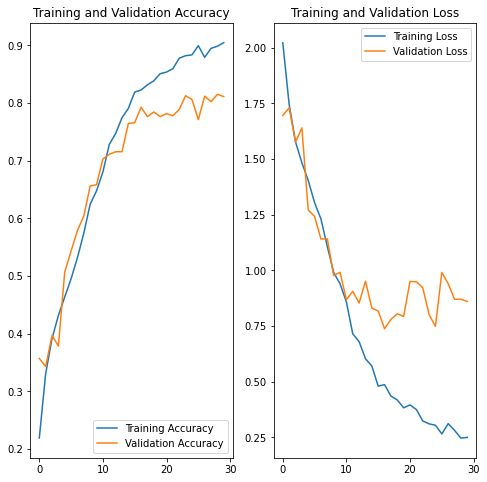

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Final observations
The Train and validation accuracy are comparable now and the accuracy is also the good number. Hence the class rebalancing has helped avoiding the over fit of the model and it has also helped to get the good model. 

